Edward Guen-Murray
Feb 23, 2023

# Data load and preprocessing

## Import packages, Prepare data

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
from sklearn import neighbors
import geopy
from sklearn import decomposition
from geopy import distance
import seaborn as sns

In [2]:
#import ds
ds = pd.read_csv("uber.csv")

In [3]:
ds.head()

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


# First Preprocessing steps and data exploration
drop first two col,
drop na,
drop an outlier

    

In [4]:
ds.shape

(200000, 9)

In [5]:
# var 'OtherPerCap' is object even though it should be a float like the rest               
ds.dtypes

Unnamed: 0             int64
key                   object
fare_amount          float64
pickup_datetime       object
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count        int64
dtype: object

In [6]:
ds.describe()

,Unnamed: 0,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,2.000000e+05,200000.000000,200000.000000,200000.000000,199999.000000,199999.000000,200000.000000
mean,2.771250e+07,11.359955,-72.527638,39.935885,-72.525292,39.923890,1.684535
std,1.601382e+07,9.901776,11.437787,7.720539,13.117408,6.794829,1.385997
min,1.000000e+00,-52.000000,-1340.648410,-74.015515,-3356.666300,-881.985513,0.000000
25%,1.382535e+07,6.000000,-73.992065,40.734796,-73.991407,40.733823,1.000000
50%,2.774550e+07,8.500000,-73.981823,40.752592,-73.980093,40.753042,1.000000
75%,4.155530e+07,12.500000,-73.967154,40.767158,-73.963658,40.768001,2.000000
max,5.542357e+07,499.000000,57.418457,1644.421482,1153.572603,872.697628,208.000000


In [7]:
#two missing values
ds.isnull().sum().sum()

2

In [8]:
ds.isna().sum()

Unnamed: 0           0
key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    1
dropoff_latitude     1
passenger_count      0
dtype: int64

In [9]:
ds = ds.dropna()

In [10]:
ds.isna().sum()

Unnamed: 0           0
key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
dtype: int64

In [11]:
#drop two columns with useless or repeated data
ds = ds.drop(['Unnamed: 0', 'key'], axis=1)

In [12]:
#208 passengers for an 11 dollar ride seems fishy, dropping it
ds[ds.eq(208).any(1)]

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
113038,11.7,2010-12-28 08:20:00 UTC,-73.937795,40.758498,-73.937835,40.758415,208


In [13]:
ds = ds.drop([113038], axis = 0)

four cases where pickup_latitude was outside the possible range of latitudes, finding and dropping them

In [14]:
ds = ds[ds.pickup_latitude < 91]

one case where dropoff_latitude was outside the possible range of latitudes, finding and dropping them

In [15]:
ds = ds[ds.dropoff_latitude < 91]

dropping seven cases where pickup_longitude is outside the range of possible longitudes

In [16]:
ds = ds[ds.pickup_longitude > -180]

In [17]:
ds = ds[ds.dropoff_longitude > -180]

In [18]:
ds.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,199986.000000,199986.000000,199986.000000,199986.000000,199986.000000,199986.000000
mean,11.359847,-72.501779,39.917932,-72.511601,39.922027,1.683513
std,9.901893,10.449981,6.130427,10.412218,6.117684,1.306964
min,-52.000000,-93.824668,-74.015515,-75.458979,-74.015750,0.000000
25%,6.000000,-73.992064,40.734793,-73.991407,40.733823,1.000000
50%,8.500000,-73.981822,40.752592,-73.980092,40.753042,1.000000
75%,12.500000,-73.967154,40.767157,-73.963658,40.768001,2.000000
max,499.000000,40.808425,48.018760,40.831932,45.031598,6.000000


bad data when any lat or long = 0, dropping all rows where any location value = 0

In [19]:
ds = ds[ds.pickup_longitude != 0.0]
ds = ds[ds.pickup_latitude != 0.0]
ds = ds[ds.dropoff_longitude != 0.0]
ds = ds[ds.dropoff_latitude != 0.0]

In [20]:
ds.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,196018.000000,196018.000000,196018.000000,196018.000000,196018.000000,196018.000000
mean,11.342963,-73.903773,40.687330,-73.903233,40.686739,1.684177
std,9.799702,2.775524,2.646892,2.766123,2.652240,1.307604
min,-52.000000,-93.824668,-74.015515,-75.458979,-74.015750,0.000000
25%,6.000000,-73.992268,40.736395,-73.991592,40.735266,1.000000
50%,8.500000,-73.982101,40.753287,-73.980521,40.753726,1.000000
75%,12.500000,-73.968313,40.767540,-73.965315,40.768326,2.000000
max,499.000000,40.808425,48.018760,40.831932,45.031598,6.000000


In [21]:
#index reset for later looping
ds = ds.reset_index()

### feature engineering
convert lat/long into distance

convert datetime into easier metric

feat eng
    price/dist

distance function distance calculation results confirmed correct by another source

In [25]:
dis = distance.great_circle((ds["pickup_latitude"][0],ds["pickup_longitude"][0]),(ds["dropoff_latitude"][0],ds["dropoff_longitude"][0])).miles
print(dis)

1.045969743168911


In [26]:
#create new column of 0's to replace with calculated distance 
ds['dist'] = 0

In [27]:
ds.head()

,index,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,dist
0,0,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1,0
1,1,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1,0
2,2,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1,0
3,3,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3,0
4,4,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5,0


In [28]:
#drop unnecessary column
ds = ds.drop(['index'], axis=1)

In [29]:
ds.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,dist
count,196018.000000,196018.000000,196018.000000,196018.000000,196018.000000,196018.000000,196018.0
mean,11.342963,-73.903773,40.687330,-73.903233,40.686739,1.684177,0.0
std,9.799702,2.775524,2.646892,2.766123,2.652240,1.307604,0.0
min,-52.000000,-93.824668,-74.015515,-75.458979,-74.015750,0.000000,0.0
25%,6.000000,-73.992268,40.736395,-73.991592,40.735266,1.000000,0.0
50%,8.500000,-73.982101,40.753287,-73.980521,40.753726,1.000000,0.0
75%,12.500000,-73.968313,40.767540,-73.965315,40.768326,2.000000,0.0
max,499.000000,40.808425,48.018760,40.831932,45.031598,6.000000,0.0


In [30]:
#calculate distance for each case using latitude and longitude of pickup and dropoff, save values to col  
for i in range(len(ds)):
    ds['dist'][i] = distance.great_circle((ds["pickup_latitude"][i],ds["pickup_longitude"][i]),(ds["dropoff_latitude"][i],ds["dropoff_longitude"][i])).miles

C:\Users\Edward Guen\AppData\Local\Temp\ipykernel_23056\912461056.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ds['dist'][i] = distance.great_circle((ds["pickup_latitude"][i],ds["pickup_longitude"][i]),(ds["dropoff_latitude"][i],ds["dropoff_longitude"][i])).miles


In [31]:
ds.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,dist
count,196018.000000,196018.000000,196018.000000,196018.000000,196018.000000,196018.000000,196018.000000
mean,11.342963,-73.903773,40.687330,-73.903233,40.686739,1.684177,2.778466
std,9.799702,2.775524,2.646892,2.766123,2.652240,1.307604,49.072453
min,-52.000000,-93.824668,-74.015515,-75.458979,-74.015750,0.000000,0.000000
25%,6.000000,-73.992268,40.736395,-73.991592,40.735266,1.000000,0.780121
50%,8.500000,-73.982101,40.753287,-73.980521,40.753726,1.000000,1.340021
75%,12.500000,-73.968313,40.767540,-73.965315,40.768326,2.000000,2.429552
max,499.000000,40.808425,48.018760,40.831932,45.031598,6.000000,5385.862452


distance of 0 means a rounding error on location data i think, will mess with price per distance calculations, creating a new dataframe without all cases where distance = 0

In [32]:
ds[ds.eq(0).any(1)]

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,dist
5,4.90,2011-02-12 02:27:09 UTC,-73.969019,40.755910,-73.969019,40.755910,1,0.000000
46,56.80,2013-01-03 22:24:41 UTC,-73.993498,40.764686,-73.993498,40.764686,1,0.000000
81,49.57,2009-08-07 10:43:07 UTC,-73.975058,40.788820,-73.975058,40.788820,1,0.000000
160,4.50,2014-01-22 21:01:18 UTC,-73.992937,40.757780,-73.992937,40.757780,1,0.000000
325,10.10,2011-08-05 07:03:08 UTC,-74.013900,40.707800,-73.992300,40.749300,0,3.082359
...,...,...,...,...,...,...,...,...
195479,5.70,2010-07-24 21:16:00 UTC,-73.924907,40.745833,-73.924907,40.745833,3,0.000000
195642,4.50,2013-02-17 11:27:00 UTC,-73.969717,40.765832,-73.969717,40.765832,3,0.000000
195674,2.50,2009-06-07 02:07:26 UTC,-73.956623,40.771633,-73.956623,40.771633,1,0.000000
195937,4.50,2013-06-24 22:17:43 UTC,-73.793768,40.656939,-73.793768,40.656939,1,0.000000


In [33]:
ds2 = ds[ds.dist != 0.0]

In [34]:
ds2.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,dist
count,193973.000000,193973.000000,193973.000000,193973.000000,193973.000000,193973.000000,193973.000000
mean,11.345502,-73.905305,40.687734,-73.904759,40.687137,1.683946,2.807758
std,9.735829,2.756479,2.635165,2.746913,2.640594,1.307180,49.329621
min,-52.000000,-93.824668,-74.015515,-75.458979,-74.015750,0.000000,0.000052
25%,6.000000,-73.992279,40.736435,-73.991600,40.735300,1.000000,0.795430
50%,8.500000,-73.982127,40.753292,-73.980564,40.753733,1.000000,1.354794
75%,12.500000,-73.968450,40.767533,-73.965502,40.768326,2.000000,2.449310
max,499.000000,40.808425,48.018760,40.831932,45.031598,6.000000,5385.862452


### creating price/mile feature

In [35]:
ds2['PpM'] = ds2['fare_amount'] / ds2['dist']

C:\Users\Edward Guen\AppData\Local\Temp\ipykernel_23056\99549506.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ds2['PpM'] = ds2['fare_amount'] / ds2['dist']


In [36]:
ds2.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,dist,PpM
0,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1,1.045970,7.170379
1,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1,1.527078,5.042311
2,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1,3.129464,4.122111
3,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3,1.032524,5.133054
4,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5,2.780920,5.753492


In [37]:
ds2.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,dist,PpM
count,193973.000000,193973.000000,193973.000000,193973.000000,193973.000000,193973.000000,193973.000000,1.939730e+05
mean,11.345502,-73.905305,40.687734,-73.904759,40.687137,1.683946,2.807758,1.370273e+02
std,9.735829,2.756479,2.635165,2.746913,2.640594,1.307180,49.329621,7.447781e+03
min,-52.000000,-93.824668,-74.015515,-75.458979,-74.015750,0.000000,0.000052,-4.154387e+03
25%,6.000000,-73.992279,40.736435,-73.991600,40.735300,1.000000,0.795430,4.777554e+00
50%,8.500000,-73.982127,40.753292,-73.980564,40.753733,1.000000,1.354794,6.149106e+00
75%,12.500000,-73.968450,40.767533,-73.965502,40.768326,2.000000,2.449310,8.130997e+00
max,499.000000,40.808425,48.018760,40.831932,45.031598,6.000000,5385.862452,1.075016e+06


In [38]:
print(ds2['PpM'].idxmin())

87564


In [39]:
ds2.loc[89316,:]

fare_amount                              8.1
pickup_datetime      2011-12-04 04:21:21 UTC
pickup_longitude                  -73.987825
pickup_latitude                    40.724217
dropoff_longitude                 -73.990914
dropoff_latitude                   40.750501
passenger_count                            1
dist                                1.823238
PpM                                 4.442646
Name: 89316, dtype: object

dropping all cases with negative fares, this should never be the case

In [40]:
ds2 = ds2[ds2.fare_amount > 1.0]

In [41]:
ds2.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,dist,PpM
count,193952.000000,193952.000000,193952.000000,193952.000000,193952.000000,193952.000000,193952.000000,1.939520e+05
mean,11.347951,-73.905298,40.687728,-73.904750,40.687130,1.683932,2.807876,1.370653e+02
std,9.731927,2.756628,2.635308,2.747061,2.640737,1.307185,49.332279,7.448178e+03
min,2.500000,-93.824668,-74.015515,-75.458979,-74.015750,0.000000,0.000052,7.751397e-04
25%,6.000000,-73.992279,40.736435,-73.991599,40.735301,1.000000,0.795585,4.777876e+00
50%,8.500000,-73.982127,40.753292,-73.980562,40.753733,1.000000,1.354902,6.149278e+00
75%,12.500000,-73.968450,40.767533,-73.965500,40.768326,2.000000,2.449334,8.131244e+00
max,499.000000,40.808425,48.018760,40.831932,45.031598,6.000000,5385.862452,1.075016e+06


In [42]:
ds2.sort_values('dist', ascending = False).head(60)

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,dist,PpM
69518,4.5,2009-06-02 16:31:00 UTC,-73.999647,40.768180,0.000213,-0.000013,1,5385.862452,0.000836
126699,10.1,2012-05-11 13:42:00 UTC,-0.128333,0.966785,-74.000577,40.762683,1,5334.683805,0.001893
51925,10.5,2012-08-07 11:31:00 UTC,-73.987150,40.687925,-0.050000,40.712542,6,3748.225812,0.002801
11661,14.9,2012-02-26 00:01:00 UTC,-0.007712,40.725602,-73.967487,40.766410,5,3746.501221,0.003977
141204,6.1,2012-05-27 13:23:00 UTC,-73.997260,40.731502,-0.066667,40.728990,1,3746.089531,0.001628
58544,7.3,2012-04-21 01:40:00 UTC,-0.066667,40.739207,-74.004487,40.741702,2,3745.807242,0.001949
171761,12.1,2012-01-24 23:03:00 UTC,-73.989282,40.736092,-0.116667,40.752877,5,3742.497919,0.003233
1903,7.0,2013-02-10 16:18:00 UTC,-0.131667,40.757063,-73.991593,40.749953,1,3741.352250,0.001871
135318,2.9,2011-09-05 19:28:00 UTC,-73.977795,40.757315,-0.116667,40.754547,1,3741.261211,0.000775
75532,12.5,2011-10-11 09:33:00 UTC,-73.973397,40.784545,-0.116667,40.750467,1,3740.350461,0.003342


In [43]:
#a bunch of funny looking coordinates when distance starts geting over 100
#for now removing 36 point where distance is over 1000 because all of those seem fishy
ds3 = ds2[ds2.dist < 1000.0]

In [44]:
ds3.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,dist,PpM
count,193913.000000,193913.000000,193913.000000,193913.000000,193913.000000,193913.000000,193913.000000,1.939130e+05
mean,11.348300,-73.910663,40.688529,-73.909587,40.688727,1.683838,2.123106,1.370928e+02
std,9.732329,2.685143,2.629267,2.685004,2.629473,1.307053,4.297380,7.448926e+03
min,2.500000,-89.933333,-74.015515,-75.458979,-74.015750,0.000000,0.000052,9.727338e-03
25%,6.000000,-73.992279,40.736438,-73.991600,40.735302,1.000000,0.795421,4.778778e+00
50%,8.500000,-73.982128,40.753292,-73.980565,40.753734,1.000000,1.354649,6.149847e+00
75%,12.500000,-73.968454,40.767532,-73.965508,40.768326,2.000000,2.448403,8.131521e+00
max,499.000000,40.808425,48.018760,40.831932,45.031598,6.000000,832.704689,1.075016e+06


In [45]:
ds2.sort_values('PpM', ascending = False).head(1500)

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,dist,PpM
11099,113.0,2013-12-06 02:17:00 UTC,-74.468770,40.476630,-74.468772,40.476630,2,0.000105,1.075016e+06
166674,499.0,2011-04-10 04:10:00 UTC,-73.968377,40.764602,-73.968368,40.764600,1,0.000491,1.016635e+06
13849,52.0,2014-01-25 03:31:46 UTC,-74.030855,40.740735,-74.030856,40.740735,1,0.000052,9.933133e+05
194704,52.0,2014-08-31 20:02:06 UTC,-73.789883,40.647023,-73.789882,40.647023,1,0.000052,9.919172e+05
1501,50.0,2009-05-28 19:40:00 UTC,-73.977602,40.782908,-73.977603,40.782908,1,0.000052,9.557151e+05
...,...,...,...,...,...,...,...,...,...
125888,2.5,2012-07-01 18:13:00 UTC,-74.006867,40.716545,-74.006333,40.716943,2,0.039220,6.374220e+01
154504,6.0,2013-10-13 01:27:48 UTC,-73.722562,40.594991,-73.722775,40.596345,2,0.094218,6.368241e+01
115807,7.0,2015-06-27 23:20:17 UTC,-73.980949,40.759369,-73.982597,40.758381,2,0.109993,6.364013e+01
27749,6.0,2011-02-13 05:26:13 UTC,-73.991541,40.749897,-73.992910,40.750785,1,0.094335,6.360295e+01


In [46]:
#theres a lot of cases where distance is less than thousandths of a mile, removing all points where dist is less than .1 miles
ds3 = ds3[ds3.dist > .1]

In [47]:
ds3.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,dist,PpM
count,192390.000000,192390.000000,192390.000000,192390.000000,192390.000000,192390.000000,192390.000000,192390.000000
mean,11.323794,-73.911240,40.688865,-73.910155,40.689064,1.684687,2.139653,7.165842
std,9.505320,2.677730,2.625014,2.677590,2.625223,1.307566,4.310313,7.315769
min,2.500000,-89.933333,-74.015515,-75.458979,-74.015750,0.000000,0.100190,0.009727
25%,6.000000,-73.992279,40.736475,-73.991595,40.735339,1.000000,0.807033,4.768303
50%,8.500000,-73.982138,40.753307,-73.980578,40.753755,1.000000,1.364709,6.126454
75%,12.500000,-73.968528,40.767559,-73.965600,40.768347,2.000000,2.463382,8.063364
max,230.000000,40.808425,48.018760,40.831932,42.464187,6.000000,832.704689,963.253974


### creating time variables from UTC datetime column

In [48]:
ds3['pickup_datetime'] = pd.to_datetime(ds3['pickup_datetime'])

In [49]:
ds3['day_of_week'] = ds3['pickup_datetime'].dt.strftime('%A')
ds3['hour'] = ds3['pickup_datetime'].dt.hour
ds3['month'] = ds3['pickup_datetime'].dt.month
ds3['year'] = ds3['pickup_datetime'].dt.year

In [50]:
ds3.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,dist,PpM,day_of_week,hour,month,year
0,7.5,2015-05-07 19:52:06+00:00,-73.999817,40.738354,-73.999512,40.723217,1,1.045970,7.170379,Thursday,19,5,2015
1,7.7,2009-07-17 20:04:56+00:00,-73.994355,40.728225,-73.994710,40.750325,1,1.527078,5.042311,Friday,20,7,2009
2,12.9,2009-08-24 21:45:00+00:00,-74.005043,40.740770,-73.962565,40.772647,1,3.129464,4.122111,Monday,21,8,2009
3,5.3,2009-06-26 08:22:21+00:00,-73.976124,40.790844,-73.965316,40.803349,3,1.032524,5.133054,Friday,8,6,2009
4,16.0,2014-08-28 17:47:00+00:00,-73.925023,40.744085,-73.973082,40.761247,5,2.780920,5.753492,Thursday,17,8,2014


In [51]:
#drop lat and long and org datetime cols now that we have better iterations of them
ds3 = ds3.drop(['pickup_datetime', 'pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude'], axis=1)

In [52]:
ds3.head()

,fare_amount,passenger_count,dist,PpM,day_of_week,hour,month,year
0,7.5,1,1.045970,7.170379,Thursday,19,5,2015
1,7.7,1,1.527078,5.042311,Friday,20,7,2009
2,12.9,1,3.129464,4.122111,Monday,21,8,2009
3,5.3,3,1.032524,5.133054,Friday,8,6,2009
4,16.0,5,2.780920,5.753492,Thursday,17,8,2014


In [53]:
#dropping cases with 0 passengers, this should never be the case
ds3 = ds3[ds3.passenger_count > 0.0]

In [54]:
ds3.sort_values('PpM', ascending = False).head(100)

,fare_amount,passenger_count,dist,PpM,day_of_week,hour,month,year
159952,108.00,1,0.112120,963.253974,Wednesday,8,7,2010
147951,110.00,1,0.150581,730.505113,Tuesday,10,6,2011
87830,85.00,1,0.147870,574.828066,Friday,5,11,2013
51704,65.00,1,0.114993,565.253102,Wednesday,19,1,2014
193673,99.00,1,0.190127,520.705478,Sunday,22,10,2010
...,...,...,...,...,...,...,...,...
163247,49.57,2,0.470672,105.317488,Friday,9,12,2009
104105,68.00,1,0.647686,104.989176,Saturday,17,12,2011
164817,11.50,4,0.110022,104.524268,Thursday,20,4,2015
18143,45.00,1,0.431946,104.179685,Sunday,15,9,2012


### Data Distributions 
horribly skewed. 

shape of dist may be due to higher edge cases, may not need to log scale if I remove more points from the data but I am cautious about edge cases that seem unlikely but still possible.

<bound method Figure.show of <Figure size 432x288 with 2 Axes>>

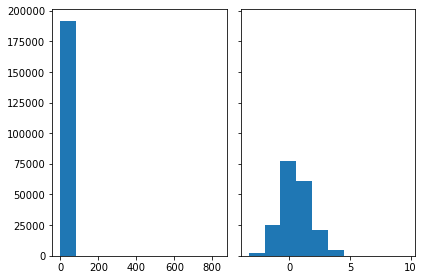

In [55]:
#plt.hist(ds3['dist'])

fig, axs = plt.subplots(1, 2, sharey=True, tight_layout=True)
axs[0].hist(ds3['dist'])
axs[1].hist(np.log2(ds3['dist']))
fig.show

<bound method Figure.show of <Figure size 432x288 with 2 Axes>>

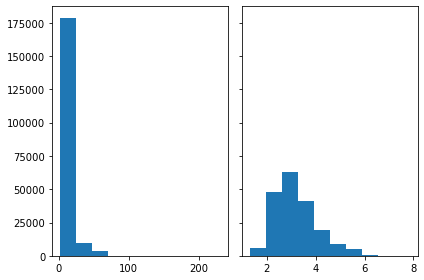

In [56]:
#plt.hist(ds3['fare_amount'])
#plt.show

fig, axs = plt.subplots(1, 2, sharey=True, tight_layout=True)
axs[0].hist(ds3['fare_amount'])
axs[1].hist(np.log2(ds3['fare_amount']))
fig.show

<bound method Figure.show of <Figure size 432x288 with 2 Axes>>

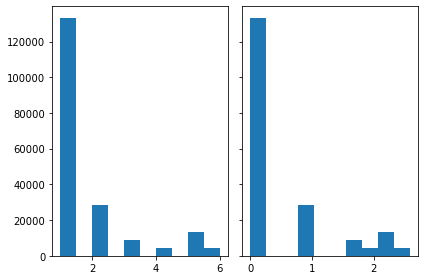

In [57]:
#plt.hist(ds3['passenger_count'])
#plt.show

fig, axs = plt.subplots(1, 2, sharey=True, tight_layout=True)
axs[0].hist(ds3['passenger_count'])
axs[1].hist(np.log2(ds3['passenger_count']))
fig.show

<bound method Figure.show of <Figure size 432x288 with 2 Axes>>

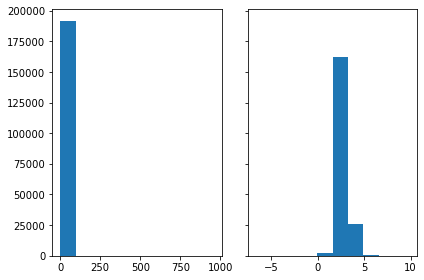

In [58]:
fig, axs = plt.subplots(1, 2, sharey=True, tight_layout=True)
axs[0].hist(ds3['PpM'])
axs[1].hist(np.log2(ds3['PpM']))
fig.show

<bound method Figure.show of <Figure size 432x288 with 3 Axes>>

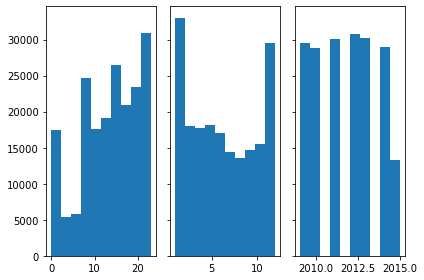

In [59]:
fig, axs = plt.subplots(1, 3, sharey=True, tight_layout=True)
axs[0].hist(ds3['hour'])
axs[1].hist(ds3['month'])
axs[2].hist(ds3['year'])
fig.show

will log scale dist, fare, PpM

passengers dosent really change

Time variables dont really meaningfully change

# log scaling dist, fare, PpM

In [60]:
ds4 = ds3
ds4['dist'] = np.log2(ds4['dist'])
ds4['fare_amount'] = np.log2(ds4['fare_amount'])
ds4['PpM'] = np.log2(ds4['PpM'])

Removing all cases where distance and PpM are unusually small. This was a change I made after clustering and noticed that there are many suspicious cases when distance and PpM are less than .1  

In [61]:
ds4 = ds4[ds4.dist > .1]

In [62]:
ds4 = ds4[ds4.PpM > .1]

In [63]:
ds4.describe()

,fare_amount,passenger_count,dist,PpM,hour,month,year
count,118685.000000,118685.000000,118685.000000,118685.000000,118685.000000,118685.000000,118685.000000
mean,3.624875,1.695185,1.249984,2.374891,13.435278,6.305986,2011.760442
std,0.765462,1.304657,0.875211,0.420626,6.773006,3.416816,1.851864
min,1.321928,1.000000,0.100010,0.101958,0.000000,1.000000,2009.000000
25%,3.087463,1.000000,0.550683,2.093651,9.000000,3.000000,2010.000000
50%,3.459432,1.000000,1.056009,2.358089,14.000000,6.000000,2012.000000
75%,4.008989,2.000000,1.758514,2.630641,19.000000,9.000000,2013.000000
max,7.845490,6.000000,5.269388,6.924585,23.000000,12.000000,2015.000000


# multicollinearity check

Fare and dist are cor
PpM and dist very cor
weak cors with year nad PpM which is interesting

In [65]:
ds4.corr()

,fare_amount,passenger_count,dist,PpM,hour,month,year
fare_amount,1.000000,0.015904,0.876943,-0.004869,-0.025173,0.030550,0.193298
passenger_count,0.015904,1.000000,0.008424,0.011415,0.012873,0.009475,0.007576
dist,0.876943,0.008424,1.000000,-0.484858,-0.050377,0.010866,0.029098
PpM,-0.004869,0.011415,-0.484858,1.000000,0.059010,0.032988,0.291222
hour,-0.025173,0.012873,-0.050377,0.059010,1.000000,-0.001852,0.001339
month,0.030550,0.009475,0.010866,0.032988,-0.001852,1.000000,-0.111344
year,0.193298,0.007576,0.029098,0.291222,0.001339,-0.111344,1.000000


<AxesSubplot:>

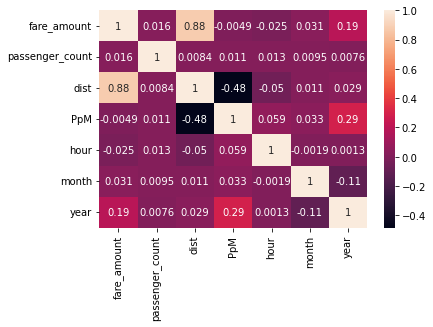

In [66]:
sns.heatmap(ds4.corr(), annot = True)

# Min max scaling
scaling all values, most features are in different units. scaling between 0-1

The best clustering, feature selected, dataset that is created here named 'ds_minmax4'

In [73]:
from sklearn import preprocessing
from sklearn.cluster import KMeans 
from sklearn.metrics import completeness_score, homogeneity_score, silhouette_score
from sklearn import decomposition
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from sklearn import metrics
import pylab as pl

In [74]:
#normalize data
min_max_scaler = preprocessing.MinMaxScaler()
ds_minmax = min_max_scaler.fit_transform(ds4.drop(['day_of_week'], axis=1))

#alt features, drop all time elements
ds_minmax4= min_max_scaler.fit_transform(ds4.drop(['day_of_week','hour','month','year'], axis=1))

In [75]:
ds_minmax

array([[0.24877979, 0.        , 0.09880559, ..., 0.86956522, 0.54545455,
        0.        ],
       [0.36289547, 0.        , 0.29905059, ..., 0.91304348, 0.63636364,
        0.        ],
       [0.41052295, 0.8       , 0.26609622, ..., 0.73913043, 0.63636364,
        0.83333333],
       ...,
       [0.55607762, 0.2       , 0.56046422, ..., 0.        , 0.45454545,
        0.        ],
       [0.38875279, 0.        , 0.20063393, ..., 0.60869565, 0.36363636,
        1.        ],
       [0.38256633, 0.        , 0.31942372, ..., 0.17391304, 0.36363636,
        0.16666667]])

# PCA transformation
uses all vars

transformed dataset will be tested in tandem with other sets 

In [77]:
pca = decomposition.PCA(n_components=6)
dsPCA = pca.fit(ds_minmax).transform(ds_minmax)

In [78]:
#5 components explain 99% of variance
print(pca.explained_variance_ratio_)

[0.27209737 0.22137346 0.21909046 0.17308744 0.10205417 0.0122971 ]


In [84]:
# four components puts total at 92%, five puts it at 99%
0.29308957 + 0.23348316 + 0.21720855 + 0.18411151 + 0.06564282 

0.9935356100000001

In [79]:
pca.explained_variance_ratio_.sum()

1.0

In [80]:
#creating new PCA dataset with only 4 components 
pca = decomposition.PCA(n_components=5)
dsPCA = pca.fit(ds_minmax).transform(ds_minmax)

In [86]:
#checking loadings of PCA componentts
loadings = pca.components_.T * np.sqrt(pca.explained_variance_)

loading_matrix = pd.DataFrame(loadings, columns=['PC1', 'PC2','PC3','PC4','PC5'], index=['fare_amount','passenger_count','dist','PpM','hour','month','year'])
loading_matrix

,PC1,PC2,PC3,PC4,PC5
fare_amount,0.011738,0.022911,0.002841,0.002384,0.125896
passenger_count,-0.001221,0.013556,-0.025835,0.259561,-0.001867
dist,0.001367,0.005543,0.003325,0.001262,0.088703
PpM,0.003542,0.004657,-0.001492,-0.000053,-0.020107
hour,0.004255,-0.007156,-0.282133,-0.023444,0.002767
month,-0.238167,0.202305,-0.006611,-0.009690,-0.004251
year,0.226947,0.211223,-0.001931,-0.008463,-0.011255


Month and year are of the highest contributing to the first two components that account for explaining ~50% of data variance. This is problematic later on when PCA clustering does not cluster the best of the tested groups and removing time related features makes the data group much better. 

# Clustering Features minus time elements
this first clustering does not include time elements, does include dist,fare, ppm.



In [81]:
#try normalized data into 2 clusters by kmeans
kmeans = KMeans(n_clusters=2, max_iter=500, verbose=1) # initialization
kmeans.fit(ds_minmax4) #does not include time elements

Initialization complete
Iteration 0, inertia 15719.36411076399.
Iteration 1, inertia 6914.972676525125.
Iteration 2, inertia 6893.637714792596.
Converged at iteration 2: strict convergence.
Initialization complete
Iteration 0, inertia 8130.654646132348.
Iteration 1, inertia 6972.4416140638095.
Iteration 2, inertia 6916.53606842854.
Iteration 3, inertia 6893.637760855805.
Converged at iteration 3: center shift 2.1119481464522812e-09 within tolerance 2.8579556822357275e-06.
Initialization complete
Iteration 0, inertia 14101.752562289297.
Iteration 1, inertia 6989.642956418399.
Iteration 2, inertia 6957.472746751353.
Converged at iteration 2: strict convergence.
Initialization complete
Iteration 0, inertia 11473.936224230896.
Iteration 1, inertia 6969.156247010886.
Iteration 2, inertia 6957.472746751353.
Converged at iteration 2: strict convergence.
Initialization complete
Iteration 0, inertia 12644.850944752052.
Iteration 1, inertia 10261.119813559255.
Iteration 2, inertia 10259.31941970

KMeans(max_iter=500, n_clusters=2, verbose=1)

In [82]:
#show centroids
#centroids = pd.DataFrame(kmeans.cluster_centers_, columns=ds3.drop(['day_of_week'], axis=1).columns)

#centroids = pd.DataFrame(kmeans.cluster_centers_, columns=ds3.drop(['day_of_week','hour','month','year','PpM'], axis=1).columns)
centroids = pd.DataFrame(kmeans.cluster_centers_, columns=ds3.drop(['day_of_week','hour','month','year'], axis=1).columns)


centroids

,fare_amount,passenger_count,dist,PpM
0,0.352555,0.036084,0.222224,0.332879
1,0.355489,0.685236,0.223703,0.334564


In [83]:
#predict cluster results from trained model
clusters = kmeans.predict(ds_minmax4)
clusters

array([0, 0, 1, ..., 0, 0, 0])

In [84]:
#many more 0's than 1's
#check all classifcation/confusion matrix metrics to check for comparable ability to predict both classes
unique, counts = np.unique(clusters, return_counts=True)

dict(zip(unique, counts))

{0: 99862, 1: 18823}

In [85]:
#save nparray as pd.dataframe for easier manipulation
ds_minmax4 = pd.DataFrame(ds_minmax4)

In [86]:
#assign predicted clusters to dataset
ds_minmax4['clusters'] = clusters

In [87]:
#ds_minmax.head()
ds_minmax4.head()

,0,1,2,3,clusters
0,0.248780,0.0,0.098806,0.327165,0
1,0.362895,0.0,0.299051,0.284557,0
2,0.410523,0.8,0.266096,0.355066,1
3,0.504752,0.8,0.535031,0.241398,1
4,0.299845,0.0,0.084251,0.387020,0


In [88]:
ds_minmax4.describe()

,0,1,2,3,clusters
count,118685.000000,118685.000000,118685.000000,118685.000000,118685.000000
mean,0.353020,0.139037,0.222459,0.333146,0.158596
std,0.117338,0.260931,0.169307,0.061652,0.365301
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.270640,0.000000,0.087181,0.291925,0.000000
50%,0.327659,0.000000,0.184935,0.330684,0.000000
75%,0.411901,0.200000,0.320832,0.370632,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000


### visualizing clusters 2 dimensions at a time

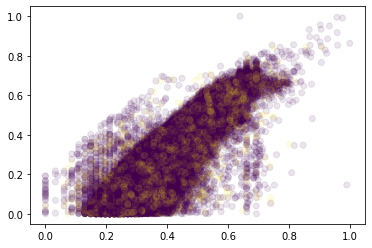

In [89]:
# variables fare x distance
plt.scatter(ds_minmax4[0], ds_minmax4[2], c=ds_minmax4['clusters'], alpha=0.1)
plt.show()

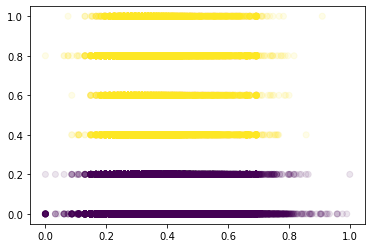

In [90]:
# variables fare x passenger count
plt.scatter(ds_minmax4[0], ds_minmax4[1], c=ds_minmax4['clusters'], alpha=0.1)
plt.show()

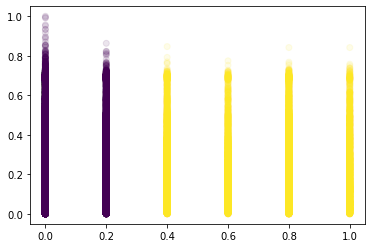

In [91]:
# variables passenger count x dist
plt.scatter(ds_minmax4[1], ds_minmax4[2], c=ds_minmax4['clusters'], alpha=0.1)
plt.show()

Only when plotting by passenger count does it really separate visually, where it separates really well.

second cluster seems to occur once passengers exceed 2

I tested clusters with and without PpM and they seem to have comparable results 

# Silhouette scores 
to determine best splitting clusters

In [105]:
#silhouette plot function taken from class tutorial 'Clustering.inpyb'
def plot_silhouettes(data, clusters, metric='euclidean'):
    
    from matplotlib import cm
    from sklearn.metrics import silhouette_samples

    cluster_labels = np.unique(clusters)
    n_clusters = cluster_labels.shape[0]
    silhouette_vals = metrics.silhouette_samples(data, clusters, metric='euclidean')
    c_ax_lower, c_ax_upper = 0, 0
    cticks = []
    for i, k in enumerate(cluster_labels):
        c_silhouette_vals = silhouette_vals[clusters == k]
        c_silhouette_vals.sort()
        c_ax_upper += len(c_silhouette_vals)
        color = cm.jet(float(i) / n_clusters)
        pl.barh(range(c_ax_lower, c_ax_upper), c_silhouette_vals, height=1.0, 
                      edgecolor='none', color=color)

        cticks.append((c_ax_lower + c_ax_upper) / 2)
        c_ax_lower += len(c_silhouette_vals)
    
    silhouette_avg = np.mean(silhouette_vals)
    print('silhouette_avg: ' + str(silhouette_avg))
    pl.axvline(silhouette_avg, color="red", linestyle="--") 

    pl.yticks(cticks, cluster_labels)
    pl.ylabel('Cluster')
    pl.xlabel('Silhouette coefficient')

    pl.tight_layout()
    #pl.savefig('images/11_04.png', dpi=300)
    pl.show()
    
    return

## K = 2 clustering silhouettes

In [213]:
silhouettes = metrics.silhouette_samples(ds_minmax4.loc[:, [0,1,2,3]], clusters)
print(silhouettes[:20])

[0.69345138 0.69313081 0.62330359 0.47721177 0.69290487 0.69688673
 0.66055629 0.72609992 0.48720603 0.59420284 0.70030094 0.42421608
 0.58742347 0.71710032 0.72219811 0.60130723 0.33159493 0.64839061
 0.63226084 0.5087235 ]


In [214]:
#clusters seem pretty good with a mean of .64 but theres def room for improvement
print(silhouettes.mean())

0.5821482765916551


silhouette_avg: 0.5821482765916551


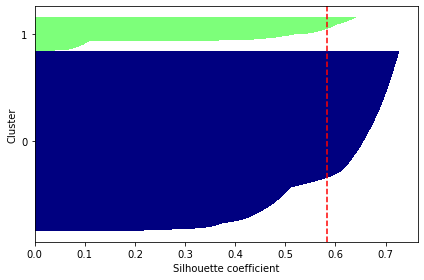

In [215]:
plot_silhouettes(ds_minmax4.loc[:, [0,1,2,3]], clusters)

## K = 3 clustering silhouettes

In [92]:
#a lot of mass in cluster 0, retrying with 3 clusters
kmeans3 = KMeans(n_clusters=3, max_iter=500, verbose=1) # initialization
kmeans3.fit(ds_minmax4.loc[:, [0,1,2,3]]) #do not include clusters column

#predict cluster results from trained model
clusters3 = kmeans3.predict(ds_minmax4.loc[:, [0,1,2,3]])
clusters3

unique, counts = np.unique(clusters3, return_counts=True)

dict(zip(unique, counts))

Initialization complete
Iteration 0, inertia 5513.282082859828.
Iteration 1, inertia 4035.224429655833.
Iteration 2, inertia 4030.70327512742.
Iteration 3, inertia 4029.134177228358.
Iteration 4, inertia 4028.610012352862.
Iteration 5, inertia 4028.4302581011084.
Converged at iteration 5: center shift 1.1208906457014688e-06 within tolerance 2.8579556822357275e-06.
Initialization complete
Iteration 0, inertia 8656.670543844673.
Iteration 1, inertia 5001.7020865988325.
Iteration 2, inertia 4042.350396447156.
Iteration 3, inertia 4040.8151869149942.
Iteration 4, inertia 4040.516082226871.
Converged at iteration 4: center shift 1.7961751972811457e-06 within tolerance 2.8579556822357275e-06.
Initialization complete
Iteration 0, inertia 5709.283589975614.
Iteration 1, inertia 4032.713907562084.
Iteration 2, inertia 4029.57627301521.
Iteration 3, inertia 4028.7538672747805.
Iteration 4, inertia 4028.4802375138584.
Converged at iteration 4: center shift 1.6366861298531599e-06 within tolerance 

{0: 73798, 1: 13458, 2: 31429}

silhouette_avg: 0.4664733308359574


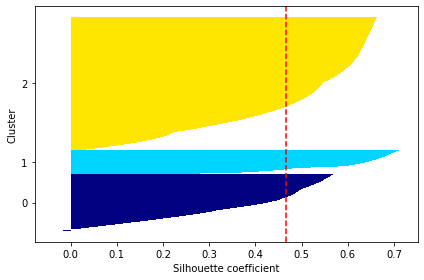

In [217]:
plot_silhouettes(ds_minmax4.loc[:, [0,1,2,3]], clusters3)

## K = 4 clustering silhouettes

In [218]:
#a lot of mass in cluster 2, retrying with 4 clusters
kmeans4 = KMeans(n_clusters=4, max_iter=500, verbose=1) # initialization
kmeans4.fit(ds_minmax4.loc[:, [0,1,2,3]]) #do not include clusters column

#predict cluster results from trained model
clusters4 = kmeans4.predict(ds_minmax4.loc[:, [0,1,2,3]])
clusters4

unique, counts = np.unique(clusters4, return_counts=True)

dict(zip(unique, counts))

Initialization complete
Iteration 0, inertia 3872.121252283482.
Iteration 1, inertia 3315.170221582659.
Iteration 2, inertia 3292.8256205227017.
Iteration 3, inertia 3289.851764168465.
Iteration 4, inertia 3288.4109753498888.
Iteration 5, inertia 3287.580754800485.
Iteration 6, inertia 3287.117105206856.
Iteration 7, inertia 3286.8924075168225.
Converged at iteration 7: center shift 2.502551830585001e-06 within tolerance 2.8579556822357275e-06.
Initialization complete
Iteration 0, inertia 4436.107269975909.
Iteration 1, inertia 3357.775384169961.
Iteration 2, inertia 3314.34521629757.
Iteration 3, inertia 3300.7098044357417.
Iteration 4, inertia 3294.084577393773.
Iteration 5, inertia 3290.725063693128.
Iteration 6, inertia 3288.8712865933853.
Iteration 7, inertia 3287.856131006626.
Iteration 8, inertia 3287.2690655879683.
Iteration 9, inertia 3286.965933936679.
Iteration 10, inertia 3286.813676394885.
Converged at iteration 10: center shift 1.763109627518127e-06 within tolerance 2.857

{0: 59170, 1: 13458, 2: 27653, 3: 18404}

silhouette_avg: 0.43348135818697636


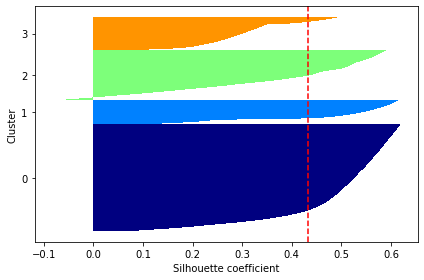

In [219]:
plot_silhouettes(ds_minmax4.loc[:, [0,1,2,3]], clusters4)

## K = 5 clustering silhouettes

In [122]:
#a lot of mass in cluster 2, retrying with 5 clusters
kmeans5 = KMeans(n_clusters=5, max_iter=500, verbose=1) # initialization
kmeans5.fit(ds_minmax4.loc[:, [0,1,2,3]]) #do not include clusters column

#predict cluster results from trained model
clusters5 = kmeans5.predict(ds_minmax4.loc[:, [0,1,2,3]])
clusters5

unique, counts = np.unique(clusters5, return_counts=True)

dict(zip(unique, counts))


Initialization complete
Iteration 0, inertia 4430.16214252462.
Iteration 1, inertia 3686.9679008251155.
Iteration 2, inertia 3480.6495504449.
Iteration 3, inertia 3394.1622931617285.
Iteration 4, inertia 3357.9958357287464.
Iteration 5, inertia 3343.535418005911.
Iteration 6, inertia 3337.307938715567.
Iteration 7, inertia 3334.5456501285635.
Iteration 8, inertia 3333.2956411136543.
Iteration 9, inertia 3332.7962716456864.
Converged at iteration 9: center shift 2.060298343082118e-06 within tolerance 2.3873531412840897e-06.
Initialization complete
Iteration 0, inertia 4277.642777318791.
Iteration 1, inertia 3334.0950629827844.
Iteration 2, inertia 3239.401528236579.
Iteration 3, inertia 3210.1578562821483.
Iteration 4, inertia 3198.177522761585.
Iteration 5, inertia 3193.0571009492264.
Iteration 6, inertia 3190.746270309743.
Iteration 7, inertia 3189.7658649791483.
Iteration 8, inertia 3189.415470485469.
Converged at iteration 8: center shift 1.5164167680736752e-06 within tolerance 2.38

{0: 58980, 1: 21707, 2: 31353, 3: 22580, 4: 57092}

silhouette_avg: 0.421897012489044


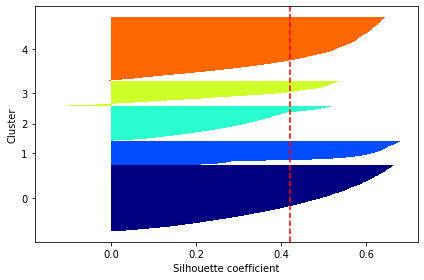

In [214]:
plot_silhouettes(ds_minmax4.loc[:, [0,1,2,3]], clusters5)

clusters using K values 3-5 all have silhouette averages between .4-.5 while k=2 has an avg ~.65 so k=2 seems to be the best number of clusters here

# PCA Clustering

## K = 2 PCA clustering silhouettes

In [112]:
#try normalized data into 2 clusters by kmeans
kmeansPCA = KMeans(n_clusters=2, max_iter=500, verbose=1) # initialization
kmeansPCA.fit(dsPCA)

Initialization complete
Iteration 0, inertia 82054.0805916889.
Iteration 1, inertia 57626.24631658738.
Iteration 2, inertia 56898.28883725452.
Iteration 3, inertia 56644.787427613155.
Iteration 4, inertia 56547.64028229145.
Iteration 5, inertia 56492.56194667686.
Iteration 6, inertia 56446.303866654336.
Iteration 7, inertia 56426.71302987973.
Iteration 8, inertia 56415.994641370504.
Iteration 9, inertia 56409.90392890569.
Iteration 10, inertia 56407.658451381365.
Iteration 11, inertia 56405.84568054593.
Iteration 12, inertia 56404.37967314788.
Converged at iteration 12: center shift 4.185539071547e-06 within tolerance 7.349215845029897e-06.
Initialization complete
Iteration 0, inertia 91362.50963652538.
Iteration 1, inertia 58919.90795797288.
Iteration 2, inertia 58141.29703788817.
Iteration 3, inertia 57451.42197095978.
Iteration 4, inertia 56887.106756992995.
Iteration 5, inertia 56442.19449890614.
Iteration 6, inertia 56111.36140325316.
Iteration 7, inertia 55901.81402148575.
Iterat

KMeans(max_iter=500, n_clusters=2, verbose=1)

In [113]:
centroidsPCA = pd.DataFrame(kmeansPCA.cluster_centers_)

centroidsPCA

,0,1,2,3,4
0,-0.258498,0.120056,-0.004302,-0.005907,-0.000897
1,0.244860,-0.113722,0.004075,0.005595,0.000849


In [114]:
#predict cluster results from trained model
clusters = kmeansPCA.predict(dsPCA)
clusters

array([1, 0, 0, ..., 0, 1, 1])

In [115]:
dsPCA = pd.DataFrame(dsPCA)

dsPCA['clusters'] = clusters

dsPCA.head()

,0,1,2,3,4,clusters
0,0.459765,0.293040,-0.227524,-0.172732,-0.088457,1
1,-0.360447,-0.300872,-0.267520,-0.150697,0.012109,0
2,-0.421437,-0.229227,-0.310750,-0.156549,0.150123,0
3,-0.306020,-0.339533,0.216138,0.296461,-0.091096,0
4,0.149723,0.414825,-0.216063,0.628162,0.104548,0


In [116]:
dsPCA.describe()

,0,1,2,3,4,clusters
count,1.917120e+05,1.917120e+05,1.917120e+05,1.917120e+05,1.917120e+05,191712.000000
mean,1.828041e-16,1.010364e-16,7.662984e-17,-1.265883e-17,-3.219228e-17,0.513546
std,3.292419e-01,2.938615e-01,2.834349e-01,2.609489e-01,1.558147e-01,0.499818
min,-7.082801e-01,-6.959530e-01,-5.085539e-01,-2.085279e-01,-4.458602e-01,0.000000
25%,-2.362224e-01,-2.086129e-01,-2.359906e-01,-1.497384e-01,-1.102771e-01,0.000000
50%,-1.648879e-02,1.058653e-02,-2.384693e-02,-1.198591e-01,-1.870460e-02,1.000000
75%,2.415381e-01,2.135164e-01,2.028468e-01,4.781875e-02,8.851389e-02,1.000000
max,7.428917e-01,7.028121e-01,6.174583e-01,9.394049e-01,7.420294e-01,1.000000


silhouette_avg: 0.2065348331355024


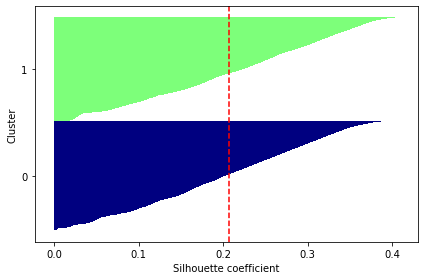

In [215]:
plot_silhouettes(dsPCA.loc[:, [0,1,2,3,4]], dsPCA['clusters'])

### visualizing clusters 2 dimensions at a time for PCA transformed data

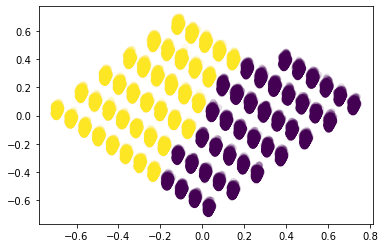

In [115]:
import matplotlib.pyplot as plt

plt.scatter(dsPCA[0], dsPCA[1], c=dsPCA['clusters'], alpha=0.1)
plt.show()

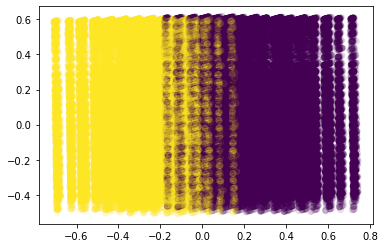

In [116]:
plt.scatter(dsPCA[0], dsPCA[2], c=dsPCA['clusters'], alpha=0.1)
plt.show()

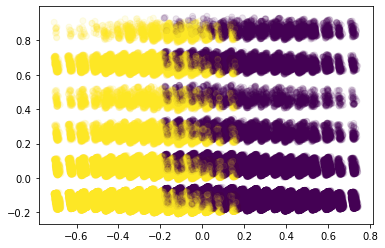

In [117]:
plt.scatter(dsPCA[0], dsPCA[3], c=dsPCA['clusters'], alpha=0.1)
plt.show()

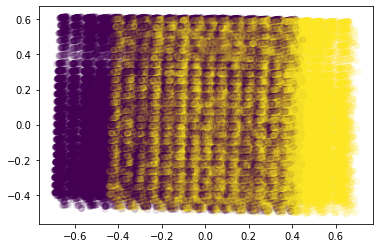

In [118]:
plt.scatter(dsPCA[1], dsPCA[2], c=dsPCA['clusters'], alpha=0.1)
plt.show()

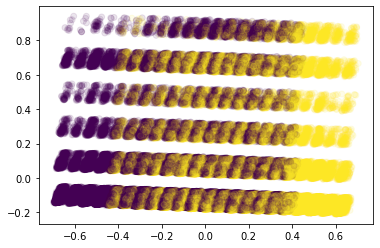

In [119]:
plt.scatter(dsPCA[1], dsPCA[3], c=dsPCA['clusters'], alpha=0.1)
plt.show()

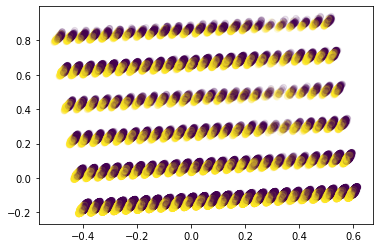

In [120]:
plt.scatter(dsPCA[2], dsPCA[3], c=dsPCA['clusters'], alpha=0.1)
plt.show()

Using PCA makes sense here, PpM is def cor with dist and fare as its constructed by them.

PCA plots seem to have visually identifiable planes that separate cluster groups, lower silhouette score suggests clusters are not optimal. 

non PCA data without PpM does not seem to cluster great (not included in report)

# Silhouette scores PCA
to determine best splitting clusters

## K = 3 PCA clustering silhouettes

In [117]:
#a lot of mass in cluster 0, retrying with 3 clusters

kmeansPCA3 = KMeans(n_clusters=3, max_iter=500, verbose=1) # initialization
kmeansPCA3.fit(dsPCA.loc[:, [0,1,2,3,4]]) #do not include clusters column

#predict cluster results from trained model
clusters3PCA = kmeansPCA3.predict(dsPCA.loc[:, [0,1,2,3,4]])

unique, counts = np.unique(clusters3PCA, return_counts=True)

dict(zip(unique, counts))

Initialization complete
Iteration 0, inertia 62729.635320256566.
Iteration 1, inertia 49077.167214256646.
Iteration 2, inertia 48806.24810405824.
Iteration 3, inertia 48609.400585584306.
Iteration 4, inertia 48226.25451629635.
Iteration 5, inertia 47644.35555765537.
Iteration 6, inertia 47162.121466771154.
Iteration 7, inertia 46870.734409066994.
Iteration 8, inertia 46818.20518000075.
Iteration 9, inertia 46805.14093518627.
Iteration 10, inertia 46795.37440812304.
Iteration 11, inertia 46787.00027676555.
Iteration 12, inertia 46776.02797760564.
Iteration 13, inertia 46753.22459693286.
Iteration 14, inertia 46690.94466438275.
Iteration 15, inertia 46645.32776875134.
Iteration 16, inertia 46643.40704300484.
Converged at iteration 16: strict convergence.
Initialization complete
Iteration 0, inertia 78767.3809373093.
Iteration 1, inertia 50984.858799239686.
Iteration 2, inertia 49553.52276390116.
Iteration 3, inertia 49223.17446574569.
Iteration 4, inertia 49123.36945958893.
Iteration 5, 

{0: 86571, 1: 23469, 2: 81672}

silhouette_avg: 0.2051720422219707


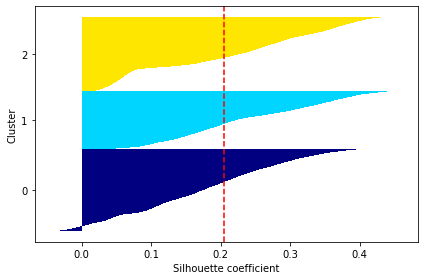

In [216]:
plot_silhouettes(dsPCA.loc[:, [0,1,2,3,4]], clusters3PCA)

k = 3 has relatively low silhouette score compared to non PCA data, much more balanced class counts

## K = 4 PCA clustering silhouettes

In [118]:
#a lot of mass in cluster 0, retrying with 4 clusters
#try normalized data into 4 clusters by kmeans
kmeansPCA4 = KMeans(n_clusters=4, max_iter=500, verbose=1) # initialization
kmeansPCA4.fit(dsPCA.loc[:, [0,1,2,3,4]]) #do not include clusters column

#predict cluster results from trained model
clusters4PCA = kmeansPCA4.predict(dsPCA.loc[:, [0,1,2,3,4]])

unique, counts = np.unique(clusters4PCA, return_counts=True)

dict(zip(unique, counts))

Initialization complete
Iteration 0, inertia 64226.63840083491.
Iteration 1, inertia 43407.54700141746.
Iteration 2, inertia 42003.64703517489.
Iteration 3, inertia 41794.84609640608.
Iteration 4, inertia 41697.83017402748.
Iteration 5, inertia 41633.30309871222.
Iteration 6, inertia 41584.691718067814.
Iteration 7, inertia 41549.36079129939.
Iteration 8, inertia 41520.80029274675.
Iteration 9, inertia 41487.12141430576.
Iteration 10, inertia 41461.91348822247.
Iteration 11, inertia 41444.4968492904.
Iteration 12, inertia 41432.139104390604.
Iteration 13, inertia 41422.060682902986.
Iteration 14, inertia 41415.11754761109.
Iteration 15, inertia 41410.40685874216.
Iteration 16, inertia 41407.291052594985.
Iteration 17, inertia 41405.41715642396.
Iteration 18, inertia 41404.19763346177.
Iteration 19, inertia 41403.37714317855.
Converged at iteration 19: center shift 7.232023297259538e-06 within tolerance 7.349215845029897e-06.
Initialization complete
Iteration 0, inertia 49135.4847767248

{0: 58431, 1: 64955, 2: 46247, 3: 22079}

silhouette_avg: 0.23128969055815318


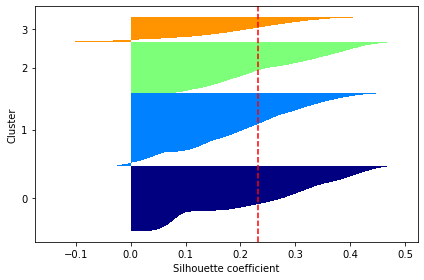

In [119]:
plot_silhouettes(dsPCA.loc[:, [0,1,2,3,4]], clusters4PCA)

### other clustering attempts had issues running

affinity propagation clustering took too much memory to run on this ds

In [122]:
from sklearn.cluster import AffinityPropagation 

In [93]:
#Aprop = AffinityPropagation() # initialization
#Aprop.fit(ds_minmax4)

Spectral clustering also took too much memory

In [124]:
from sklearn.cluster import SpectralClustering 

In [94]:
#SpecCl = SpectralClustering() # initialization
#SpecCl.fit(ds_minmax4)

# Train Test Split data for classification
final cluster assignments being tested for classification ability, splitting data into train and test splits for both main dataset and PCA transformed dataset

In [124]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

In [220]:
X = ds_minmax4.drop(columns = 'clusters')
y = ds_minmax4['clusters']

In [128]:
XP = dsPCA.drop(columns = 'clusters')
yP = dsPCA['clusters']

In [221]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 55, test_size= 0.20)

In [131]:
X_trainP, X_testP, y_trainP, y_testP = train_test_split(XP, yP, random_state = 55, test_size= 0.20)

# KNN classification
hypers to vary: n_neigh, weights

In [222]:
### KNN on normalized but not PCA'd data, inital test model ###
KNNmod = KNeighborsClassifier(n_neighbors=3)
KNNmod.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [223]:
knnpreds_test = KNNmod.predict(X_test)

In [224]:
print(classification_report(y_test, knnpreds_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     19929
           1       1.00      1.00      1.00      3808

    accuracy                           1.00     23737
   macro avg       1.00      1.00      1.00     23737
weighted avg       1.00      1.00      1.00     23737



In [135]:
y_test

172312    0
32038     0
16407     0
154762    0
102595    0
         ..
185760    0
106260    0
160056    0
180587    0
16752     1
Name: clusters, Length: 38343, dtype: int32

In [225]:
print (KNNmod.score(X_test, y_test))

1.0


In [226]:
print (KNNmod.score(X_train, y_train))

1.0


In [139]:
### Knn on PCA transformed data ###
KNNmodPCA = KNeighborsClassifier(n_neighbors=3)
KNNmodPCA.fit(X_trainP, y_trainP)

KNeighborsClassifier(n_neighbors=3)

In [140]:
knnpreds_testPCA = KNNmodPCA.predict(X_testP)

In [141]:
print(classification_report(y_testP, knnpreds_testPCA))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     18591
           1       1.00      1.00      1.00     19752

    accuracy                           1.00     38343
   macro avg       1.00      1.00      1.00     38343
weighted avg       1.00      1.00      1.00     38343



## implementing grid search to test other hyperparameters

In [142]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold

In [143]:
#given helper functions, very useful. taken from DSC 540 Project 3, Prof Iliyas Istun
def print_results(results):
    print('BEST PARAMS: {}\n'.format(results.best_params_))

    means = results.cv_results_['mean_test_score']
    stds = results.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, results.cv_results_['params']):
        print('{:.3f} (+/-{:.2f}) for {}'.format(round(mean, 3), round(std * 2, 3), params))

def ConfusionPlotter(model):
    y_pred = model.predict(X_val)
    y_predTrain = model.predict(X_train2)
    
    print('Confusion Matrix:')
    metrics.ConfusionMatrixDisplay.from_predictions(y_val, y_pred, colorbar=False);
    print('')
    print('Precision, Recall, F1')
    print(metrics.classification_report(y_val, y_pred))
    print('')
    print('Balanced Acc:')
    print(metrics.balanced_accuracy_score(y_val, y_pred))
    print('')
    print('Specificity:')
    print(metrics.recall_score(y_val, y_pred, pos_label=0))
    print('')
    print('Training Acc:')
    print(metrics.accuracy_score(y_train2, y_predTrain))
    print('')
    print('Validation Acc:')
    print(metrics.accuracy_score(y_val, y_pred))

RANDOM_STATE = 0

In [227]:
# create validation set from Train/Test set
X_train2, X_val, y_train2, y_val = train_test_split(X_train, y_train, test_size=0.20, random_state=RANDOM_STATE)

### running KNN classifier

Confusion Matrix:

Precision, Recall, F1
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     16077
           1       1.00      1.00      1.00      2913

    accuracy                           1.00     18990
   macro avg       1.00      1.00      1.00     18990
weighted avg       1.00      1.00      1.00     18990


Balanced Acc:
1.0

Specificity:
1.0

Training Acc:
1.0

Validation Acc:
1.0


{'n_neighbors': 3}

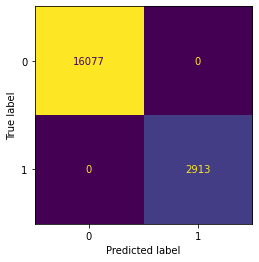

In [228]:
clfKNN = KNeighborsClassifier()
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=0)
params = dict(
    n_neighbors = [3,5,7,9,15,19,25,29,35,39,45,49],
)

gsKNN = GridSearchCV(estimator=clfKNN, param_grid=params, scoring='f1', cv=cv, n_jobs=-1, )

#fit model, find best, make predictions
gsKNN.fit(X_train, y_train)
best_estimator = gsKNN.best_estimator_

ConfusionPlotter(best_estimator)

gsKNN.best_params_

### Logistic regression classifier

In [146]:
## Logistic Regression
from sklearn.linear_model import LogisticRegression

Confusion Matrix:

Precision, Recall, F1
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     16077
           1       1.00      1.00      1.00      2913

    accuracy                           1.00     18990
   macro avg       1.00      1.00      1.00     18990
weighted avg       1.00      1.00      1.00     18990


Balanced Acc:
1.0

Specificity:
1.0

Training Acc:
1.0

Validation Acc:
1.0


{'C': 0.05}

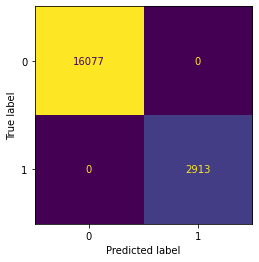

In [229]:
clfLR = LogisticRegression(max_iter = 10000)
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=0)

params = dict(
    C = [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1, 
         0.5, 1, 2, 10, 50, 100, 200, 500, 1000, 2000, 5000, 10000],
)

gsLR = GridSearchCV(estimator=clfLR, param_grid=params, scoring='f1', cv=cv, n_jobs=-1, )

#fit model, find best, make predictions
gsLR.fit(X_train, y_train)
best_estimator = gsLR.best_estimator_

ConfusionPlotter(best_estimator)

gsLR.best_params_

# getting 100% classification ability on  ~20K samples
true for both reg and PCA data, so multicollinearity may not be interrupting cases
clusters not as clear if increase K value but two class perfect class acc is odd.

Next will try clustering and KNN again without MC features (dist and fare) and again, but include all time features

# Clustering without Dist/Fare_amount
on non-PCA transformed data as there is no more MC in dataset

In [148]:
#create DS that drop dist/fare (highly cor with each other and PpM)
ds_ppm = min_max_scaler.fit_transform(ds4.drop(['day_of_week','dist','fare_amount'], axis=1))
pd.DataFrame(ds_ppm).head()

,0,1,2,3,4
0,0.0,0.573998,0.826087,0.363636,1.000000
1,0.0,0.543389,0.869565,0.545455,0.000000
2,0.0,0.525872,0.913043,0.636364,0.000000
3,0.4,0.544940,0.347826,0.454545,0.000000
4,0.8,0.554859,0.739130,0.636364,0.833333


In [149]:
ds_ppm

array([[0.        , 0.57399789, 0.82608696, 0.36363636, 1.        ],
       [0.        , 0.54338934, 0.86956522, 0.54545455, 0.        ],
       [0.        , 0.52587247, 0.91304348, 0.63636364, 0.        ],
       ...,
       [0.2       , 0.52038242, 0.        , 0.45454545, 0.        ],
       [0.        , 0.56669283, 0.60869565, 0.36363636, 1.        ],
       [0.        , 0.52725885, 0.17391304, 0.36363636, 0.16666667]])

In [150]:
def ConfusionPlotterPPM(model):
    y_predPPM = model.predict(X_valPPM)
    y_predTrainPPM = model.predict(X_trainPPM)
    
    print('Confusion Matrix:')
    metrics.ConfusionMatrixDisplay.from_predictions(y_valPPM, y_predPPM, colorbar=False);
    print('')
    print('Precision, Recall, F1')
    print(metrics.classification_report(y_valPPM, y_predPPM))
    print('')
    print('Balanced Acc:')
    print(metrics.balanced_accuracy_score(y_valPPM, y_predPPM))
    print('')
    print('Specificity:')
    print(metrics.recall_score(y_valPPM, y_predPPM, pos_label=0))
    print('')
    print('Training Acc:')
    print(metrics.accuracy_score(y_trainPPM, y_predTrainPPM))
    print('')
    print('Validation Acc:')
    print(metrics.accuracy_score(y_valPPM, y_predPPM))

### K = 2 clustering for dataset minus distance/fare

In [151]:
#try normalized data into 2 clusters by kmeans
kmeansPPM = KMeans(n_clusters=2, max_iter=500, verbose=1) # initialization
kmeansPPM.fit(ds_ppm) #does not include time elements

#predict cluster results from trained model
clustersPPM = kmeansPPM.predict(ds_ppm)
#clusters

#many more 0's than 1's
unique, counts = np.unique(clustersPPM, return_counts=True)

dict(zip(unique, counts))

Initialization complete
Iteration 0, inertia 66428.09144193583.
Iteration 1, inertia 53253.53232577206.
Iteration 2, inertia 52031.41307011987.
Iteration 3, inertia 51439.957776385185.
Iteration 4, inertia 51233.32172958096.
Iteration 5, inertia 51217.016756356745.
Iteration 6, inertia 51210.951011177254.
Iteration 7, inertia 51197.97564543453.
Iteration 8, inertia 51194.45496724225.
Iteration 9, inertia 51192.38787112659.
Converged at iteration 9: center shift 2.3624651058941896e-06 within tolerance 6.880510097619326e-06.
Initialization complete
Iteration 0, inertia 66417.67753390505.
Iteration 1, inertia 57019.453786293314.
Iteration 2, inertia 55300.218824862786.
Iteration 3, inertia 54301.58706525975.
Iteration 4, inertia 53463.537898386465.
Iteration 5, inertia 52775.904030081045.
Iteration 6, inertia 52350.78533015232.
Iteration 7, inertia 52082.54030687739.
Iteration 8, inertia 51906.252954809315.
Iteration 9, inertia 51726.30061004132.
Iteration 10, inertia 51566.81551785007.
I

{0: 93259, 1: 98453}

without dist and fare features, classes are near evenly split

In [152]:
ds_ppm = pd.DataFrame(ds_ppm)

ds_ppm['clusters'] = clustersPPM

ds_ppm.head()

Xppm = ds_ppm.drop(columns = 'clusters')
yppm = ds_ppm['clusters']

silhouette_avg: 0.22273063191349354


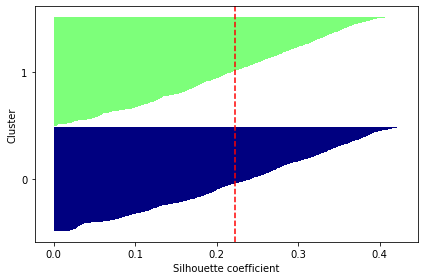

In [153]:
plot_silhouettes(ds_ppm.loc[:, [0,1,2,3,4]], clustersPPM)

relatively low silhouette score. will try other clustering sizes

### K = 3 clustering for dataset minus distance/fare

In [166]:
#try normalized data into 3 clusters by kmeans
kmeansPPM3 = KMeans(n_clusters=3, max_iter=500, verbose=1) # initialization
kmeansPPM3.fit(ds_ppm) #does not include time elements

#predict cluster results from trained model
clustersPPM3 = kmeansPPM3.predict(ds_ppm)
#clusters

#many more 0's than 1's
unique, counts = np.unique(clustersPPM3, return_counts=True)

print(dict(zip(unique, counts)))

ds_ppm3 = pd.DataFrame(ds_ppm)

ds_ppm3['clusters'] = clustersPPM3

#ds_ppm3.head()

D:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


Initialization complete
Iteration 0, inertia 69790.96645871621.
Iteration 1, inertia 47009.99326772592.
Iteration 2, inertia 46024.66274699401.
Iteration 3, inertia 45655.39079352404.
Iteration 4, inertia 45589.01456240887.
Iteration 5, inertia 45564.469050780186.
Iteration 6, inertia 45548.89342838265.
Iteration 7, inertia 45541.44218227515.
Iteration 8, inertia 45528.43393501902.
Iteration 9, inertia 45514.173839984694.
Iteration 10, inertia 45511.09589006247.
Converged at iteration 10: strict convergence.
Initialization complete
Iteration 0, inertia 57401.44969655152.
Iteration 1, inertia 44305.78616227702.
Iteration 2, inertia 44037.305284726935.
Iteration 3, inertia 43995.62434435884.
Iteration 4, inertia 43984.400206613966.
Iteration 5, inertia 43978.145969408564.
Iteration 6, inertia 43973.71272778533.
Iteration 7, inertia 43969.96385681692.
Iteration 8, inertia 43968.03922491464.
Iteration 9, inertia 43966.18783347867.
Iteration 10, inertia 43964.25041732168.
Iteration 11, iner

D:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


silhouette_avg: 0.19742541742912154


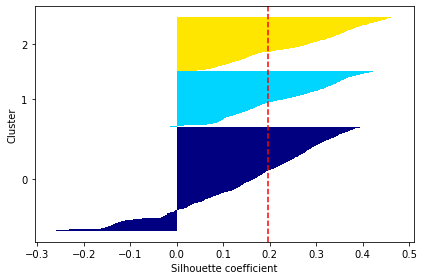

In [167]:
plot_silhouettes(ds_ppm.loc[:, [0,1,2,3,4]], clustersPPM3)

even lower silhouette score than K = 2

### K = 4 clustering for dataset minus distance/fare

In [168]:
#try normalized data into 4 clusters by kmeans
kmeansPPM4 = KMeans(n_clusters=4, max_iter=500, verbose=1) # initialization
kmeansPPM4.fit(ds_ppm) #does not include time elements

#predict cluster results from trained model
clustersPPM4 = kmeansPPM4.predict(ds_ppm)
#clusters

#many more 0's than 1's
unique, counts = np.unique(clustersPPM4, return_counts=True)

print(dict(zip(unique, counts)))

#ds_ppm4 = pd.DataFrame(ds_ppm)

#ds_ppm4['clusters'] = clustersPPM4

D:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


Initialization complete
Iteration 0, inertia 54694.43503617608.
Iteration 1, inertia 38263.50975849729.
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 63691.60712781443.
Iteration 1, inertia 39614.58169468087.
Iteration 2, inertia 39114.00173601882.
Iteration 3, inertia 38791.79651811214.
Iteration 4, inertia 38727.67606838766.
Iteration 5, inertia 38722.80277112151.
Converged at iteration 5: strict convergence.
Initialization complete
Iteration 0, inertia 58192.10857675768.
Iteration 1, inertia 39242.981834397644.
Iteration 2, inertia 39061.22571183145.
Iteration 3, inertia 38975.933770377174.
Iteration 4, inertia 38894.52921811805.
Iteration 5, inertia 38789.56808102359.
Iteration 6, inertia 38664.54300405382.
Iteration 7, inertia 38523.222319266.
Iteration 8, inertia 38428.19379342398.
Iteration 9, inertia 38371.44451387042.
Iteration 10, inertia 38332.49087975161.
Iteration 11, inertia 38310.59593932443.
Iteration 12, inertia 38294.378884

D:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


silhouette_avg: 0.19555082536855162


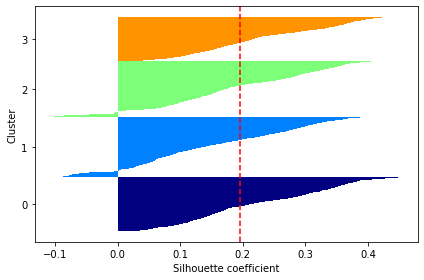

In [169]:
plot_silhouettes(ds_ppm.loc[:, [0,1,2,3,4]], clustersPPM4)

### making train, test, validation data splits for no dist/fare feature group

In [154]:
X_trainPPM, X_testPPM, y_trainPPM, y_testPPM = train_test_split(Xppm, yppm, random_state = 55, test_size= 0.20)

In [155]:
# create validation set from Train/Test set
X_trainPPM, X_valPPM, y_trainPPM, y_valPPM = train_test_split(X_trainPPM, y_trainPPM, test_size=0.20, random_state=RANDOM_STATE)

Confusion Matrix:

Precision, Recall, F1
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     14902
           1       1.00      1.00      1.00     15772

    accuracy                           1.00     30674
   macro avg       1.00      1.00      1.00     30674
weighted avg       1.00      1.00      1.00     30674


Balanced Acc:
0.9998993423701517

Specificity:
0.9997986847403033

Training Acc:
0.9999918497086271

Validation Acc:
0.9999021973006454


{'n_neighbors': 3}

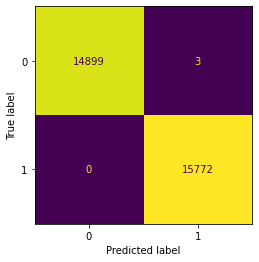

In [156]:
params = dict(
    n_neighbors = [3,5,7,9,15,19,25,29,35,39,45,49],
)

gsKNN_PPM = GridSearchCV(estimator=clfKNN, param_grid=params, scoring='f1', cv=cv, n_jobs=-1, )

#fit model, find best, make predictions
gsKNN_PPM.fit(X_trainPPM, y_trainPPM)
best_estimator = gsKNN_PPM.best_estimator_

ConfusionPlotterPPM(best_estimator)

gsKNN_PPM.best_params_

Confusion Matrix:

Precision, Recall, F1
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     14902
           1       1.00      1.00      1.00     15772

    accuracy                           1.00     30674
   macro avg       1.00      1.00      1.00     30674
weighted avg       1.00      1.00      1.00     30674


Balanced Acc:
1.0

Specificity:
1.0

Training Acc:
1.0

Validation Acc:
1.0


{'C': 0.005}

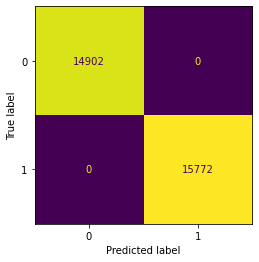

In [204]:
params = dict(
    C = [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1, 
         0.5, 1, 2, 10, 50, 100, 200, 500, 1000, 2000, 5000, 10000],
)
gsLR_PPM = GridSearchCV(estimator=clfLR, param_grid=params, scoring='f1', cv=cv, n_jobs=-1, )

#fit model, find best, make predictions
gsLR_PPM.fit(X_trainPPM, y_trainPPM)
best_estimator = gsLR_PPM.best_estimator_

ConfusionPlotterPPM(best_estimator)

gsLR_PPM.best_params_

removing MC vars did not greatly affect classification ability of model, hurt the KNN performance only slightly, logistic reg did not change

# Clustering with all vars on non-pca data
PCA loadings seem to favor month/year, see if adding them in changes non-pca cluster 

In [157]:
def ConfusionPlotterALL(model):
    y_predALL = model.predict(X_valALL)
    y_predTrainALL = model.predict(X_trainALL)
    
    print('Confusion Matrix:')
    metrics.ConfusionMatrixDisplay.from_predictions(y_valALL, y_predALL, colorbar=False);
    print('')
    print('Precision, Recall, F1')
    print(metrics.classification_report(y_valALL, y_predALL))
    print('')
    print('Balanced Acc:')
    print(metrics.balanced_accuracy_score(y_valALL, y_predALL))
    print('')
    print('Specificity:')
    print(metrics.recall_score(y_valALL, y_predALL, pos_label=0))
    print('')
    print('Training Acc:')
    print(metrics.accuracy_score(y_trainALL, y_predTrainALL))
    print('')
    print('Validation Acc:')
    print(metrics.accuracy_score(y_valALL, y_predALL))

### K = 2 clustering for dataset with all features

In [158]:
#try normalized data into 2 clusters by kmeans
kmeansALL = KMeans(n_clusters=2, max_iter=500, verbose=1) # initialization
kmeansALL.fit(ds_minmax) #does not include time elements

#predict cluster results from trained model
clustersALL = kmeansALL.predict(ds_minmax)
#clusters

#many more 0's than 1's
unique, counts = np.unique(clustersALL, return_counts=True)

dict(zip(unique, counts))

Initialization complete
Iteration 0, inertia 81624.69125493271.
Iteration 1, inertia 60570.75477382033.
Iteration 2, inertia 60136.98745714067.
Iteration 3, inertia 60111.94620133215.
Iteration 4, inertia 60079.82618630505.
Iteration 5, inertia 60071.963562469864.
Converged at iteration 5: strict convergence.
Initialization complete
Iteration 0, inertia 96520.13549494129.
Iteration 1, inertia 60477.13349775685.
Iteration 2, inertia 59903.57142865025.
Iteration 3, inertia 59158.828678641556.
Iteration 4, inertia 58256.33443847823.
Iteration 5, inertia 57560.77114898667.
Iteration 6, inertia 57147.80758044285.
Iteration 7, inertia 56943.057198063885.
Iteration 8, inertia 56917.6351058033.
Iteration 9, inertia 56913.7122869603.
Converged at iteration 9: center shift 1.600316640404734e-06 within tolerance 5.2835951017516905e-06.
Initialization complete
Iteration 0, inertia 78747.35552860207.
Iteration 1, inertia 60914.96931477715.
Iteration 2, inertia 60209.612128168556.
Iteration 3, inert

{0: 93259, 1: 98453}

In [159]:
ds_ALL = pd.DataFrame(ds_minmax)

ds_ALL['clusters'] = clustersALL

ds_ALL.head()

Xall = ds_ALL.drop(columns = 'clusters')
yall = ds_ALL['clusters']

silhouette_avg: 0.20484719981372873


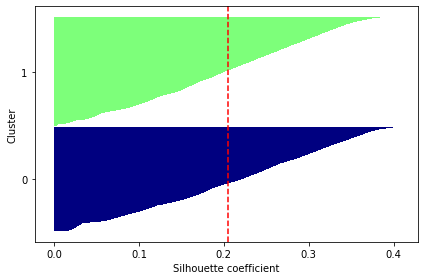

In [160]:
plot_silhouettes(ds_ALL.loc[:, [0,1,2,3,4,5,6]], clustersALL)

relatively low silhouette score

### K = 3 clustering for dataset with all features

In [162]:
#try ALL normalized data into 3 clusters by kmeans
kmeansALL3 = KMeans(n_clusters=3, max_iter=500, verbose=1) # initialization
kmeansALL3.fit(ds_minmax) #does not include time elements

#predict cluster results from trained model
clustersALL3 = kmeansALL3.predict(ds_minmax)
#clusters

#many more 0's than 1's
unique, counts = np.unique(clustersALL3, return_counts=True)

dict(zip(unique, counts))

ds_ALL3 = pd.DataFrame(ds_minmax)

ds_ALL3['clusters'] = clustersALL3

ds_ALL3.head()

Initialization complete
Iteration 0, inertia 60772.45272294969.
Iteration 1, inertia 51242.04335796954.
Iteration 2, inertia 50092.19092477367.
Iteration 3, inertia 49675.86936432666.
Iteration 4, inertia 49498.692262042074.
Iteration 5, inertia 49390.706069989574.
Iteration 6, inertia 49315.58221905924.
Iteration 7, inertia 49256.07149413091.
Iteration 8, inertia 49210.84203845078.
Iteration 9, inertia 49172.74021891266.
Iteration 10, inertia 49142.81947576436.
Iteration 11, inertia 49119.90665214227.
Iteration 12, inertia 49101.05719358699.
Iteration 13, inertia 49085.56937479657.
Iteration 14, inertia 49069.53728141275.
Iteration 15, inertia 49053.643143791385.
Iteration 16, inertia 49040.62814473087.
Iteration 17, inertia 49032.864443683204.
Iteration 18, inertia 49030.59022758021.
Iteration 19, inertia 49029.98989159408.
Iteration 20, inertia 49029.08044581064.
Iteration 21, inertia 49026.91346049508.
Iteration 22, inertia 49025.48462563715.
Iteration 23, inertia 49024.83536589638

,0,1,2,3,4,5,6,clusters
0,0.242960,0.0,0.259893,0.573998,0.826087,0.363636,1.000000,1
1,0.248780,0.0,0.301821,0.543389,0.869565,0.545455,0.000000,0
2,0.362895,0.0,0.381320,0.525872,0.913043,0.636364,0.000000,0
3,0.166177,0.4,0.258460,0.544940,0.347826,0.454545,0.000000,2
4,0.410523,0.8,0.368237,0.554859,0.739130,0.636364,0.833333,2


silhouette_avg: 0.2288503832117406


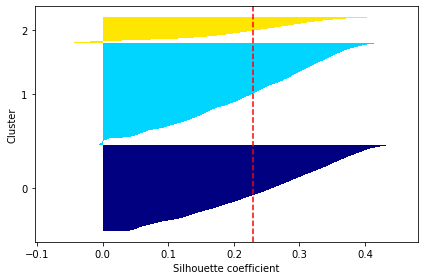

In [163]:
plot_silhouettes(ds_ALL3.loc[:, [0,1,2,3,4,5,6]], clustersALL3)

relatively low silhouette score

### K = 4 clustering for dataset with all features

In [164]:
#try ALL normalized data into 3 clusters by kmeans
kmeansALL4 = KMeans(n_clusters=4, max_iter=500, verbose=1) # initialization
kmeansALL4.fit(ds_minmax) #does not include time elements

#predict cluster results from trained model
clustersALL4 = kmeansALL4.predict(ds_minmax)
#clusters

#many more 0's than 1's
unique, counts = np.unique(clustersALL4, return_counts=True)

dict(zip(unique, counts))

ds_ALL4 = pd.DataFrame(ds_minmax)

ds_ALL4['clusters'] = clustersALL4

Initialization complete
Iteration 0, inertia 54749.182796374706.
Iteration 1, inertia 44447.09179126213.
Iteration 2, inertia 42260.49975467365.
Iteration 3, inertia 41454.448916381916.
Iteration 4, inertia 41188.27642585517.
Iteration 5, inertia 41105.89385447815.
Iteration 6, inertia 41083.359312378845.
Iteration 7, inertia 41075.96247718857.
Iteration 8, inertia 41072.892089213114.
Iteration 9, inertia 41071.22220671326.
Iteration 10, inertia 41070.32450421029.
Iteration 11, inertia 41069.65996315855.
Converged at iteration 11: center shift 5.070182067869076e-06 within tolerance 5.2835951017516905e-06.
Initialization complete
Iteration 0, inertia 56375.493686437214.
Iteration 1, inertia 45390.760577390705.
Iteration 2, inertia 44664.867751829916.
Iteration 3, inertia 44133.44962998057.
Iteration 4, inertia 43846.09960136223.
Iteration 5, inertia 43729.56799120086.
Iteration 6, inertia 43677.883130500166.
Iteration 7, inertia 43646.6882919636.
Iteration 8, inertia 43618.71699913191.


silhouette_avg: 0.22892249403389883


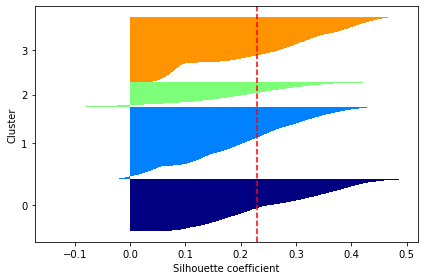

In [165]:
plot_silhouettes(ds_ALL4.loc[:, [0,1,2,3,4,5,6]], clustersALL4)

### making train, test, validation data splits for all features, feature group

In [ ]:
X_trainALL, X_testALL, y_trainALL, y_testALL = train_test_split(Xall, yall, random_state = 55, test_size= 0.20)

# create validation set from Train/Test set
X_trainALL, X_valALL, y_trainALL, y_valALL = train_test_split(X_trainALL, y_trainALL, test_size=0.20, random_state=RANDOM_STATE)

In [ ]:
params = dict(
    n_neighbors = [3,5,7,9,15,19,25,29,35,39,45,49],
)

gsKNN_ALL = GridSearchCV(estimator=clfKNN, param_grid=params, scoring='f1', cv=cv, n_jobs=-1, )

#fit model, find best, make predictions
gsKNN_ALL.fit(X_trainALL, y_trainALL)
best_estimator = gsKNN_ALL.best_estimator_

ConfusionPlotterALL(best_estimator)

gsKNN_ALL.best_params_

In [ ]:
params = dict(
    C = [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1, 
         0.5, 1, 2, 10, 50, 100, 200, 500, 1000, 2000, 5000, 10000],
)
gsLR_ALL = GridSearchCV(estimator=clfLR, param_grid=params, scoring='f1', cv=cv, n_jobs=-1, )

#fit model, find best, make predictions
gsLR_ALL.fit(X_trainALL, y_trainALL)
best_estimator = gsLR_ALL.best_estimator_

ConfusionPlotterALL(best_estimator)

gsLR_ALL.best_params_


## individual cluster summary statistics for best clustering labels on original data

In [204]:
dsC = ds4.drop(['day_of_week','hour','month','year'], axis=1)

In [206]:
dsC1 = dsC[dsC['cluster'] == 1]

In [207]:
dsC0 = dsC[dsC['cluster'] == 0]

In [208]:
dsC1.describe()

,fare_amount,passenger_count,dist,PpM,cluster
count,18823.000000,18823.000000,18823.000000,18823.000000,18823.0
mean,3.640980,4.426181,1.256417,2.384563,1.0
std,0.767260,1.041054,0.878164,0.419563,0.0
min,1.321928,3.000000,0.100011,0.203467,1.0
25%,3.087463,3.000000,0.557622,2.100251,1.0
50%,3.498251,5.000000,1.065133,2.369487,1.0
75%,4.008989,5.000000,1.757040,2.640523,1.0
max,7.255784,6.000000,4.476452,5.749980,1.0


In [209]:
dsC0.describe()

,fare_amount,passenger_count,dist,PpM,cluster
count,99862.000000,99862.000000,99862.000000,99862.000000,99862.0
mean,3.621839,1.180419,1.248771,2.373069,0.0
std,0.765089,0.384538,0.874653,0.420803,0.0
min,1.321928,1.000000,0.100010,0.101958,0.0
25%,3.087463,1.000000,0.549505,2.092466,0.0
50%,3.459432,1.000000,1.054251,2.355940,0.0
75%,4.000000,1.000000,1.758715,2.628478,0.0
max,7.845490,2.000000,5.269388,6.924585,0.0


### Conclusions

Clustering the data revealed that the data is best grouped after removing time related features and separating the data into two clusters. The first cluster centroid is distinguished by relatively lower values for fares, distances traveled, and passengers ferried with the second distinguished by higher values for each. Utilizing these cluster labels as targets for KNN  and logistic regression classification techniques returned perfect classification accuracy on validation cases. This suggests these clusters are easily predictable by the information included in their data, demonstrating the soundness of the clusters. It is possible to separate the uber cases into distinct, classifiable groups but this specific analysis found passenger count to be the main differentiator between more and less expensive uber rides.  